In [1]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select

import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import time

Using TensorFlow backend.


In [ ]:
# load model

from keras.models import load_model
import string
import numpy as np
import warnings
warnings.filterwarnings("ignore")

characters = string.digits + string.ascii_uppercase + string.whitespace[0]

def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([characters[x] for x in y])

model = load_model('models/model_cnn_split.h5')
model5 = load_model('models/model_cnn_5.h5')
model6 = load_model('models/model_cnn_6.h5')

In [18]:
driver = webdriver.Chrome("./chromedriver.exe") # chromedriver 路徑
driver.maximize_window()
driver.get('http://railway.hinet.net/Foreign/TW/etno_roundtrip.html') # 去回票訂票網址

#身份證字號
id_textbox = driver.find_element_by_id('person_id')
id_textbox.send_keys("")

#起站代碼
from_station = driver.find_element_by_id('from_station')
from_station.send_keys("100")#台北
#到站代碼
to_station = driver.find_element_by_id('to_station')
to_station.send_keys("051")#花蓮


#去程日期車次
getin_date = driver.find_element_by_id('getin_date')
Select(getin_date).select_by_visible_text('2018/08/11【六】')#日期

train_no = driver.find_element_by_id('train_no')
train_no.send_keys("412")#車次

資料填寫完成


In [ ]:
#回程日期車次 (單程不須執行)
try:
    getin_date2 = driver.find_element_by_id('getin_date2')
    Select(getin_date2).select_by_visible_text('2018/08/11【六】')#日期

    train_no2 = driver.find_element_by_id('train_no2')
    train_no2.send_keys("230")#車次
except:
    pass

In [20]:
# 一直等到12點
while time.localtime(time.time()).tm_hour != 0:
    pass

KeyboardInterrupt: 

連線成功 !


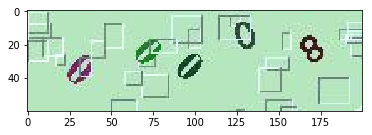

00008


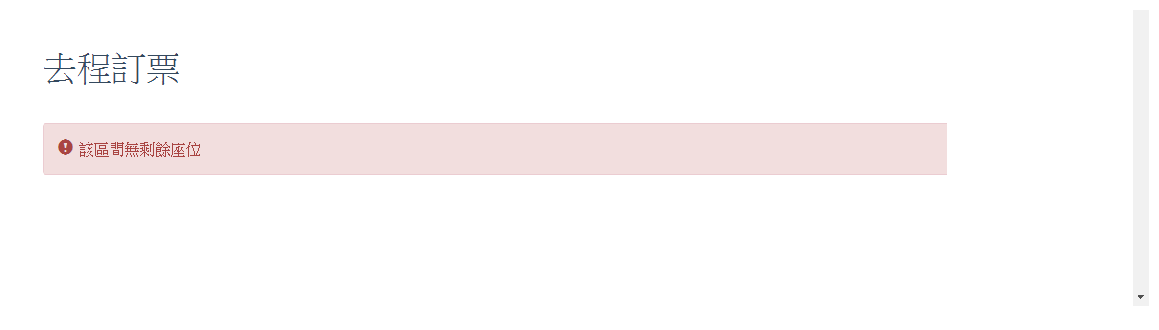

In [19]:
button = driver.find_element_by_tag_name('button')
button.click()

wait = WebDriverWait(driver, 2)
while True:
    try:
        wait.until(EC.presence_of_element_located((By.ID, 'sbutton')))
        print ('連線成功 !')
        time.sleep(0.1)
        break
    except:
        print ('連線逾時或是網路不穩定  重試')

while True:
    driver.save_screenshot('screenshot.png')
    location = driver.find_element_by_id('idRandomPic').location
    x, y = location['x'] + 5, location['y'] + 5
    screenshot = Image.open('screenshot.png')

    captcha = screenshot.crop((x, y, x+200, y+60))
    captcha = captcha.convert("RGB")#.save('captcha.jpg', 'JPEG')

    plt.figure()
    plt.imshow(captcha)
    plt.show()
    
    a = np.expand_dims(captcha, 0)
    y_pred = model.predict(a)[0][0]
    if y_pred < 0.5: #5
        y_pred = model5.predict(a)
    else:
        y_pred = model6.predict(a)
    out = decode(y_pred)
    print (out)
    
    
    answer = out
    captcha_textbox = driver.find_element_by_id('randInput')
    captcha_textbox.send_keys(answer)
    driver.find_element_by_id('sbutton').click()
    
    if "亂數驗證失敗" in driver.page_source:
        print ("亂數驗證失敗")
        button = driver.find_element_by_tag_name('button')
        button.click()
        time.sleep(0.1)
    else:
        break


# show result
driver.save_screenshot('screenshot.png')
screenshot = Image.open('screenshot.png').crop((200, 310, 1366, 619))
plt.figure(figsize=(20, 20))
plt.imshow(screenshot)
plt.axis('off')
plt.show()